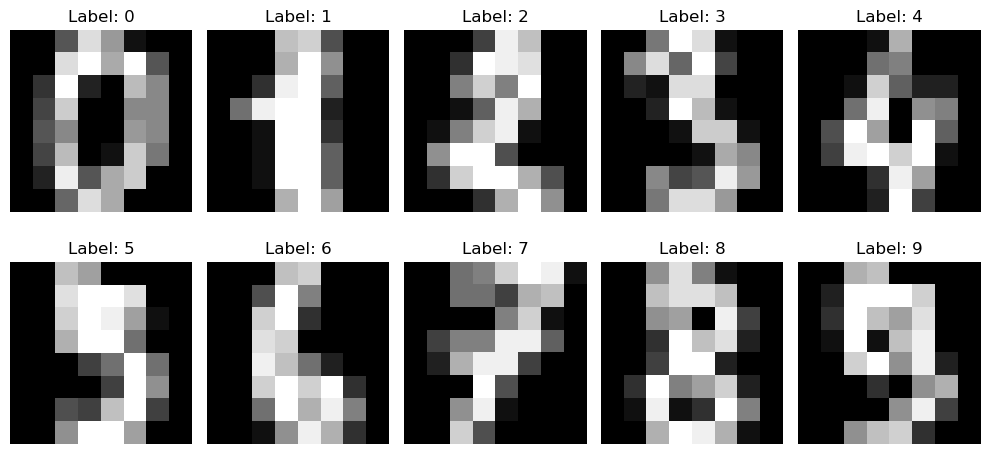

In [1]:
#dataset loading and visualization

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the dataset
digits = load_digits()
X = digits.images  # Images (8x8 grayscale)
y = digits.target  # Labels (0-9)

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [2]:
#DAta Processing

import numpy as np

# Normalize and reshape data
X = X / 16.0  # Normalize pixel values (original range: 0-16)
X = X.reshape(-1, 8, 8, 1)  # Add channel dimension for CNN

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Build a CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_model.summary()


C:\Users\adnan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,602 (150.79 KB)

 Trainable params: 38,602 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Train the CNN Model

history = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2193 - loss: 2.2388 - val_accuracy: 0.6701 - val_loss: 1.9071
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5659 - loss: 1.7537 - val_accuracy: 0.7604 - val_loss: 1.2371
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7155 - loss: 1.1589 - val_accuracy: 0.8056 - val_loss: 0.7334
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7811 - loss: 0.8104 - val_accuracy: 0.8854 - val_loss: 0.4902
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8586 - loss: 0.5712 - val_accuracy: 0.8993 - val_loss: 0.3947
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8717 - loss: 0.4675 - val_accuracy: 0.9201 - val_loss: 0.2951
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9117 - loss: 0.3754 - val_accuracy: 0.9340 - val_loss: 0.2448
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9072 - loss: 0.3467 - val_accuracy: 0.9410 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9735 - loss: 0.0796  
Test Accuracy: 97.50%


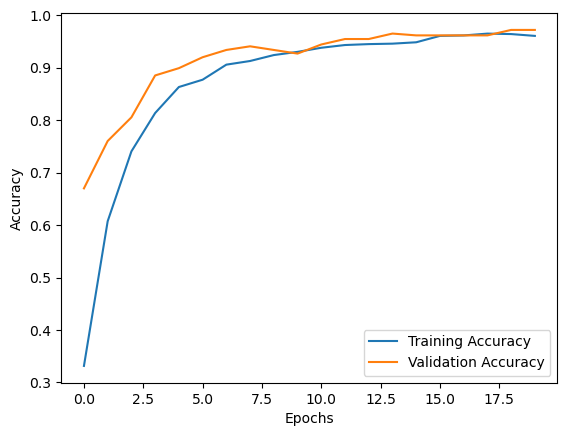

In [5]:
#Evaluate the model

# Evaluate performance
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


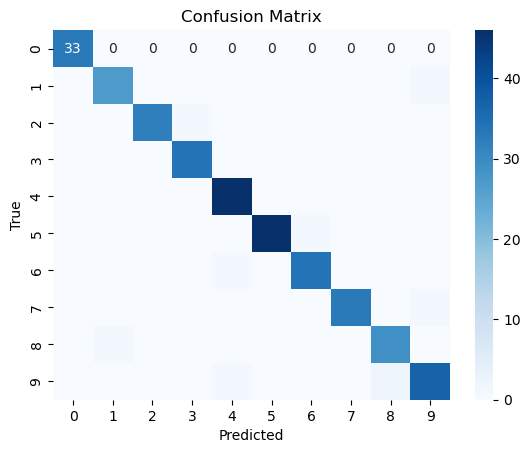

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       1.00      0.97      0.98        33
           3       0.97      1.00      0.99        34
           4       0.96      1.00      0.98        46
           5       1.00      0.98      0.99        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.95      0.93      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



In [6]:
#Confusion Matrix and Classification Report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", report)


In [7]:
# Save the model
cnn_model.save('digits_cnn_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('digits_cnn_model.h5')

# Evaluate the loaded model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Test Accuracy: {accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9735 - loss: 0.0796  
Loaded Model Test Accuracy: 97.50%
